## MetENP

MetENP is a R package that enables detection of significant metabolites from metabolite information 
(names or names and concentration along with metadata information) and provides

1. Enrichment score of metabolite class,
2. Maps to pathway of the species of choice,
3. Calculate enrichment score of pathways,
4. Plots the pathways and shows the metabolite increase or decrease
5. Gets gene info, reaction info, enzyme info

For more info, check out the vignette.

In [1]:
if (!requireNamespace("KEGGREST", quietly = TRUE))
    BiocManager::install("KEGGREST", update = TRUE, ask = FALSE)

if (!requireNamespace("KEGGgraph", quietly = TRUE))
    BiocManager::install("KEGGgraph", update = TRUE, ask = FALSE)

if (!requireNamespace("pathview", quietly = TRUE))
    BiocManager::install("pathview", update = TRUE, ask = FALSE)

#if (!requireNamespace("KEGG.db", quietly = TRUE))
#    BiocManager::install("KEGG.db", update = TRUE, ask = FALSE)

#if (!requireNamespace("MetENP", quietly = TRUE))
#    devtools::install("..", upgrade = "never")



##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################



In [2]:
USER_HOME=Sys.getenv("HOME");
USER_PWD=Sys.getenv("PWD");
#.libPaths( c( .libPaths(), paste0(USER_HOME, "/.local/R") ))
.libPaths( c( .libPaths(), paste0(USER_PWD, "/../../R") )); # suitable path to where MetENP R package is installed
#.libPaths( c( .libPaths(), paste0("../../R") )); # suitable path to where MetENP R package is installed

library(MetENP)

#### If you do not wish to install, alternatively, download from github(https://github.com/metabolomicsworkbench/MetENP) and load libraries and functions
#### Complete information for this study is at Metabolomics Workbench: https://www.metabolomicsworkbench.org/data/DRCCMetadata.php?Mode=Study&StudyID=ST001985&StudyType=MS&ResultType=1

In [3]:
data = getmwstudies('ST001985', 'data')
head(data)

analysis_id,analysis_summary,metabolite_name,metabolite_id,20181204-Blank2,20181204-Blank3,20181204-Blank4,20181204-Blank5,20181204-MMV693183P-240-1,20181204-MMV693183P-240-2,⋯,20190426-NDP_1,20190426-NDP_2,20190426-NDP_3,20190426-QC183-1,20190426-QC183-2,20190426-QC183-3,20190426-Blank1,20190426-Blank2,20181204-Blank1,refmet_name
<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<named list>
AN003236,Reversed phase NEGATIVE ION MODE,1_3-Bisphosphoglyceric acid,ME458834,911.6533,16447180,40281680,37669190,614505641.9,589435637.5,⋯,5130719.958,6070067.503,7586710.541,38932836.17,51155891.67,47930596.31,NA,NA,NA,NULL
AN003236,Reversed phase NEGATIVE ION MODE,1-Methyladenosine,ME458835,NA,NA,NA,NA,NA,NA,⋯,5908.734339,6942.059888,1231.869772,39671.39065,26223.79829,26179.84244,NA,NA,NA,1-Methyladenosine
AN003236,Reversed phase NEGATIVE ION MODE,2_3-Diphosphoglyceric acid,ME458836,911.6533,16447180,40281680,37669190,614505641.9,589435637.5,⋯,5130719.958,6070067.503,7586710.541,38932836.17,51155891.67,47930596.31,NA,NA,NA,1-Methyladenosine
AN003236,Reversed phase NEGATIVE ION MODE,2-dehydro-D-gluconate,ME458837,NA,NA,NA,NA,NA,NA,⋯,179125.6894,164490.5187,92577.32602,361195.974,283278.6163,299283.589,1761.79,2477.828,NA,1-Methyladenosine
AN003236,Reversed phase NEGATIVE ION MODE,2-Hydroxy-2-methylbutanedioic acid,ME458838,2871755,3050498,3675826,2327061,33576557.34,37414391.87,⋯,1678808.814,1817061.304,1511999.172,3312609.37,3302939.36,2939304.107,187403.6,55864.51,4167707,Citramalic acid
AN003236,Reversed phase NEGATIVE ION MODE,2-Isopropylmalic acid,ME458840,2628016,2812556,2793305,1897650,90528.87966,1091644.108,⋯,94362.41109,17463.18124,361210.1068,432406.2965,157470.5547,162752.5211,153811.1,354170.6,2716606,2-Isopropylmalic acid


In [4]:
metadata = getmwstudies('ST001985', 'factors')
head(metadata)

,study_id,local_sample_id,subject_type,factors,Factor
,<named list>,<named list>,<named list>,<named list>,<chr>
1,ST001985,20181204-Blank1,Cultured cells,Factor:20181204-Blank,20181204-Blank
2,ST001985,20181204-Blank2,Cultured cells,Factor:20181204-Blank,20181204-Blank
3,ST001985,20181204-Blank3,Cultured cells,Factor:20181204-Blank,20181204-Blank
4,ST001985,20181204-Blank4,Cultured cells,Factor:20181204-Blank,20181204-Blank
5,ST001985,20181204-Blank5,Cultured cells,Factor:20181204-Blank,20181204-Blank
6,ST001985,20181204-MMV693183P-24-1,Cultured cells,Factor:20181204-MMV693183P-24,20181204-MMV693183P-24


Find the factors you would want to compare
Multiple factors (independent variables) are formatted in multiple columns but you can get information on all the factors by "factors" column, such as 'TreatmentGroup:Prednisolone', this indicates column name 'TreatmentGroup' with factor Prednisolone. For t-test use the factors in the same column. For comparing multipe independent variables use anova by anova_ana function.


### Associate metabolomics data to the refmet class


In [5]:

refmet_class= convert_refmet(data)
head(refmet_class)

,metabolite_name,analysis_id,analysis_summary,metabolite_id,20181204-Blank2,20181204-Blank3,20181204-Blank4,20181204-Blank5,20181204-MMV693183P-240-1,20181204-MMV693183P-240-2,⋯,20190426-QC183-2,20190426-QC183-3,20190426-Blank1,20190426-Blank2,20181204-Blank1,refmet_name,formula,super_class,main_class,sub_class
,<chr>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<named list>,<chr>,<chr>,<chr>,<chr>
1,1_3-Bisphosphoglyceric acid,AN003236,Reversed phase NEGATIVE ION MODE,ME458834,911.6533,16447180,40281680,37669190,614505641.9,589435637.5,⋯,51155891.67,47930596.31,NA,NA,NA,NULL,NA,NA,NA,NA
2,1-Methyladenosine,AN003236,Reversed phase NEGATIVE ION MODE,ME458835,NA,NA,NA,NA,NA,NA,⋯,26223.79829,26179.84244,NA,NA,NA,1-Methyladenosine,C11H15N5O4,Nucleic acids,Purines,Purine ribonucleosides
3,2_3-Diphosphoglyceric acid,AN003236,Reversed phase NEGATIVE ION MODE,ME458836,911.6533,16447180,40281680,37669190,614505641.9,589435637.5,⋯,51155891.67,47930596.31,NA,NA,NA,1-Methyladenosine,NA,NA,NA,NA
4,2-dehydro-D-gluconate,AN003236,Reversed phase NEGATIVE ION MODE,ME458837,NA,NA,NA,NA,NA,NA,⋯,283278.6163,299283.589,1761.79,2477.828,NA,1-Methyladenosine,NA,NA,NA,NA
5,2-Hydroxy-2-methylbutanedioic acid,AN003236,Reversed phase NEGATIVE ION MODE,ME458838,2871755,3050498,3675826,2327061,33576557.34,37414391.87,⋯,3302939.36,2939304.107,187403.6,55864.51,4167707,Citramalic acid,C5H8O5,Organic acids,Hydroxy acids,Beta hydroxy acids
6,2-Isopropylmalic acid,AN003236,Reversed phase NEGATIVE ION MODE,ME458840,2628016,2812556,2793305,1897650,90528.87966,1091644.108,⋯,157470.5547,162752.5211,153811.1,354170.6,2716606,2-Isopropylmalic acid,C7H12O5,Fatty Acyls,Fatty acids,Hydroxy FA


In [6]:
unique(metadata$factors)


[[1]]
[1] "Factor:20181204-Blank"

[[2]]
[1] "Factor:20181204-MMV693183P-24"

[[3]]
[1] "Factor:20181204-MMV693183P-2.4"

[[4]]
[1] "Factor:20181204-MMV693183P-240"

[[5]]
[1] "Factor:20181204-NDP"

[[6]]
[1] "Factor:20181204-QC183"

[[7]]
[1] "Factor:20181211-Blank"

[[8]]
[1] "Factor:20181211-MMV693183B-24"

[[9]]
[1] "Factor:20181211-MMV693183B-2.4"

[[10]]
[1] "Factor:20181211-MMV693183B-240"

[[11]]
[1] "Factor:20181211-NDB"

[[12]]
[1] "Factor:20181211-QC183"

[[13]]
[1] "Factor:20190426-183B_24"

[[14]]
[1] "Factor:20190426-183B_2.4"

[[15]]
[1] "Factor:20190426-183B_240"

[[16]]
[1] "Factor:20190426-183P_24"

[[17]]
[1] "Factor:20190426-183P_2.4"

[[18]]
[1] "Factor:20190426-183P_240"

[[19]]
[1] "Factor:20190426-Blank"

[[20]]
[1] "Factor:20190426-NDB"

[[21]]
[1] "Factor:20190426-NDP"

[[22]]
[1] "Factor:20190426-QC183"

In [7]:
### Find the analysis mode
unique(data$analysis_summary)

[[1]]
[1] "Reversed phase NEGATIVE ION MODE"

### Find significant metabolites, run significance of all the analysis summary together. The analysis summary/modes you got in the previous section
There is a normalization step which takes into account missing values, and this can be achieved via three methods:

1) half_of_min: where the NAs are replaced by half of min values in the data

2) remove_NAs: where Cols with NAs values are removed

3) 50percent: where cols with more than 50% NAs values are removed

half_of_min is ideal when you wish to see which metabolites were present in either group. Very high fold change would mean it was present in either group. 

In [8]:
stats_metabolites = significant_met(metabolomics_data=refmet_class, met_col="metabolite_name",analysis_type=c('Reversed phase NEGATIVE ION MODE'), metadata=metadata, factor1='20181204-Blank', factor2=c('20181204-MMV693183P-24'), factor_col='Factor',sample_col='local_sample_id', p_adjust='fdr',normalization="50percent")

sig_metabolites = stats_metabolites[which(stats_metabolites[,"pval"] <= 0.05&abs(stats_metabolites[,"log2Fold_change"])>0.5),]


Warning message:
“ggrepel: 66 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


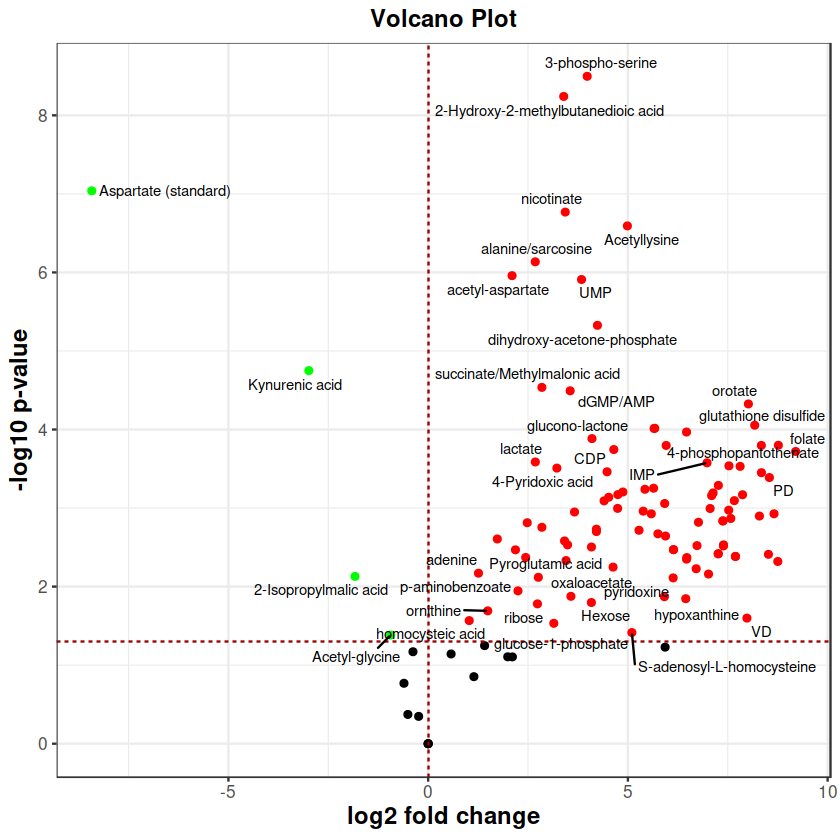

In [9]:
plot_volcano(stats_metabolites, thres_pval= 0.05,thres_log2foldchange = 0.0, TRUE)

### Map metabolite class of the significant metabolites utilzing refmet classification in Metabolomics Workbench
This function not only maps metabolite to metabolite class but also to external databases such as pubchem, inchi key, smiles and kegg

In this example, we will go forward with significant metabolite obtained by t-test/

In [10]:

sig_metabolites_kegg_id= map_keggid(sig_metabolites)

#### Check all your significant metabolites have not been assigned metabolite class

In [11]:
setdiff(sig_metabolites$refmet_name, sig_metabolites_kegg_id$refmet_name)

character(0)

### Count metabolites in each of the metabolite class and plotting
You may choose from sub_class, main_class and super_class

In [12]:
count_changes = metcountplot(df_metclass=sig_metabolites_kegg_id, metclass='sub_class', plotting=TRUE, thres_logfC = 0.0, updown_fillcolor=c("red", "green"))
print(count_changes$sig_met_count)

                     sub_class No.of_metabolites                 color
1               6-aminopurines                 1 increased metabolites
2              Acyl carnitines                 1 increased metabolites
3              Acylaminosugars                 1 increased metabolites
4                  Amino acids                32 increased metabolites
5                     Amino FA                 2 increased metabolites
6           Aminobenzoic acids                 1 increased metabolites
7           Beta hydroxy acids                 2 increased metabolites
8           Dicarboxylic acids                 1 increased metabolites
9                   Dipeptides                 2 increased metabolites
10                 Folic acids                 1 increased metabolites
11             Gluconolactones                 1 increased metabolites
12              Glycosylamines                 1 increased metabolites
13                     Hexoses                 1 increased metabolites
14    

Warning message:
“Use of `count_changes[[metclass]]` is discouraged. Use `.data[[metclass]]` instead.”


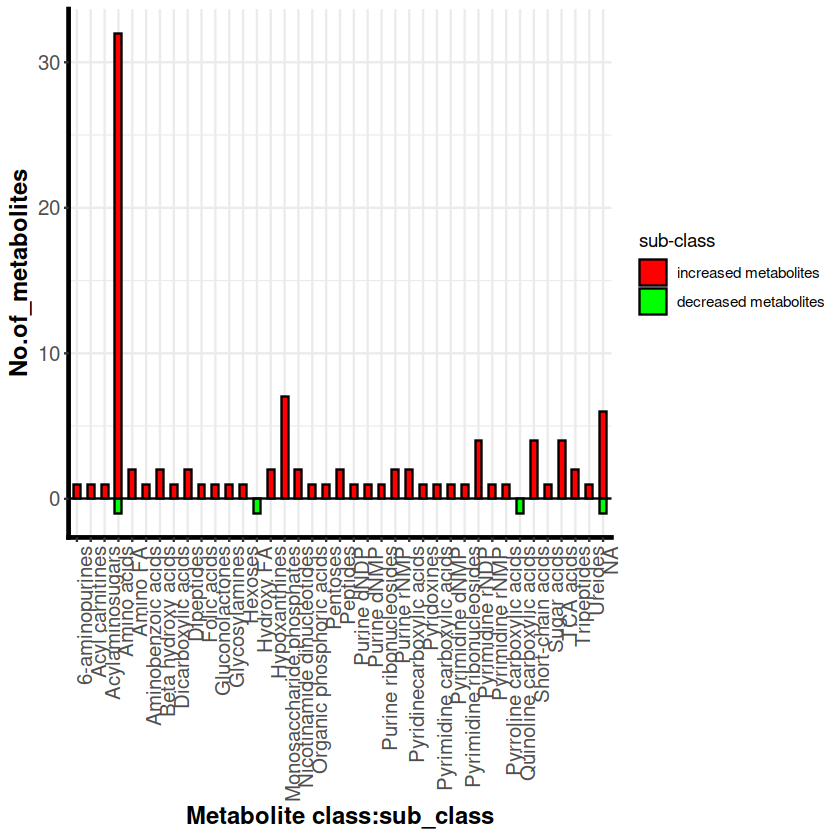

In [13]:
count_changes$plotimg

### Enrichment class score

Calculate the enrichment score of each metabolite class. Enrichment score is calculated through hypergeometric method. One can specify the no. of significant metabolites in a class while calculating the enrichment score. We advice to use the number of mtabolites in each class as 3 or more. But if someone just wants to know the enrichment score and rest of the information of all the metabolites, then they can choose the number as 1.

In [14]:
# pass debug = 0 below or comment some lines to suppress some print output
metenrichment = metclassenrichment(df_metclass=sig_metabolites_kegg_id,refmet_class, metclass="sub_class",enrich_stats="HG",no=1, debug = 1)
print(head(metenrichment))
#knitr::kable(head(metenrichment))
metenrichment[metenrichment$main_class %in% c("Ceramides", "Sphingomyelins"), c("Metabolite", "pval", "super_class", "main_class", "sub_class", "HG p-value")]
colnames(metenrichment)
metenrichment$super_class
metenrichment$main_class
metenrichment$sub_class

                     refmet_name Exact mass KEGG ID
1 (R)-4'-Phosphopantothenic acid   299.0770        
2       2-Hydroxyisocaproic acid   132.0786        
3          2-Isopropylmalic acid   176.0685  C02504
4         3-Phosphoglyceric acid   185.9929  C00197
5               4-Pyridoxic acid   183.0532  C00847
6         4,5-Dihydroorotic acid   158.0328  C00337
                      Metabolite 20181204-Blank_mean
1          4-phosphopantothenate            64794.59
2 hydroxyproline/Aminolevulinate            308143.6
3          2-Isopropylmalic acid             2569627
4             3-phosphoglycerate            703381.3
5               4-Pyridoxic acid            347969.8
6                 dihydroorotate            97384.06
  20181204-MMV693183P-24_mean Fold_change log2Fold_change    t_value
1                 38113277.88 588.2169774        9.200205 -72.044578
2                   5710874.2  18.5331586        4.212037 -18.624702
3                      722112   0.2810182       -1.831264 

Metabolite,pval,super_class,main_class,sub_class,HG p-value
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>


[1] "refmet_name"                 "Exact mass"                 
 [3] "KEGG ID"                     "Metabolite"                 
 [5] "20181204-Blank_mean"         "20181204-MMV693183P-24_mean"
 [7] "Fold_change"                 "log2Fold_change"            
 [9] "t_value"                     "pval"                       
[11] "padj"                        "metabolite_id"              
[13] "super_class"                 "main_class"                 
[15] "sub_class"                   "formula"                    
[17] "HG p-value"

[1] "Organic acids"                "Organic acids"               
 [3] "Fatty Acyls"                  "Organic acids"               
 [5] "Organoheterocyclic compounds" "Organic acids"               
 [7] "Fatty Acyls"                  "Carbohydrates"               
 [9] "Nucleic acids"                "Organic acids"               
[11] "Organoheterocyclic compounds" "Organic acids"               
[13] "Organic acids"                "Organic acids"               
[15] "Organic acids"                "Fatty Acyls"                 
[17] "Organic acids"                "Nucleic acids"               
[19] "Organic acids"                "Nucleic acids"               
[21] "Nucleic acids"                "Organic acids"               
[23] "Nucleic acids"                "Organoheterocyclic compounds"
[25] "Carbohydrates"                "Organic acids"               
[27] "Fatty Acyls"                  "Fatty Acyls"                 
[29] "Carbohydrates"                "Carbohydrates"               
[31] "Carbohydrates"                "Organic acids"               
[33] "Organic acids"                "Organic acids"               
[35] "Nucleic acids"                "Nucleic acids"               
[37] "Nucleic acids"                "Carbohydrates"               
[39] "Organic acids"                "Organic acids"               
[41] "Nucleic acids"                "Nucleic acids"               
[43] "Nucleic acids"                "Organic acids"               
[45] "Organoheterocyclic compounds" "Organic acids"               
[47] "Organic acids"                "Organic acids"               
[49] "Organic acids"                "Carbohydrates"               
[51] "Organic acids"                "Organic acids"               
[53] "Organic acids"                "Organic acids"               
[55] "Organic acids"                "Organic acids"               
[57] "Organic acids"                "Nucleic acids"               
[59] "Nucleic acids"                "Organoheterocyclic compounds"
[61] "Organic acids"                "Organic acids"               
[63] "Nucleic acids"                "Organic acids"               
[65] "Organic acids"                "Organic acids"               
[67] "Benzenoids"                   "Organic acids"               
[69] "Organic acids"                "Organic acids"               
[71] "Organic acids"                "Organic acids"               
[73] "Organic acids"                "Organic acids"               
[75] "Organic acids"                "Organoheterocyclic compounds"
[77] "Organoheterocyclic compounds" "Carbohydrates"               
[79] "Carbohydrates"                "Carbohydrates"               
[81] "Carbohydrates"                "Carbohydrates"               
[83] "Carbohydrates"                "Organic acids"               
[85] "Organic acids"                "Organic acids"               
[87] "Organic acids"                "Organic acids"               
[89] "Organic acids"                "Nucleic acids"               
[91] "Nucleic acids"                "Nucleic acids"               
[93] "Nucleic acids"                "Organic acids"

[1] "Amino acids and peptides"   "Amino acids and peptides"  
 [3] "Fatty acids"                "Short-chain acids"         
 [5] "Pyridines"                  "Amino acids and peptides"  
 [7] "Fatty acids"                "Monosaccharides"           
 [9] "Purines"                    "Amino acids and peptides"  
[11] "Ureas"                      "Amino acids and peptides"  
[13] "Amino acids and peptides"   "Amino acids and peptides"  
[15] "Amino acids and peptides"   "Fatty esters"              
[17] "Amino acids and peptides"   "Pyrimidines"               
[19] "Hydroxy acids"              "Pyrimidines"               
[21] "Purines"                    "Short-chain acids"         
[23] "Pyrimidines"                "Pterins"                   
[25] "Monosaccharides"            "TCA acids"                 
[27] "Fatty acids"                "Fatty acids"               
[29] "Monosaccharides"            "Monosaccharides"           
[31] "Monosaccharides"            "Amino acids and peptides"  
[33] "Amino acids and peptides"   "Amino acids and peptides"  
[35] "Purines"                    "Purines"                   
[37] "Purines"                    "Monosaccharides"           
[39] "Amino acids and peptides"   "Amino acids and peptides"  
[41] "Purines"                    "Purines"                   
[43] "Purines"                    "Amino acids and peptides"  
[45] "Quinolines"                 "Short-chain acids"         
[47] "Amino acids and peptides"   "Hydroxy acids"             
[49] "Amino acids and peptides"   "Monosaccharides"           
[51] "Amino acids and peptides"   "Amino acids and peptides"  
[53] "Amino acids and peptides"   "Amino acids and peptides"  
[55] "Amino acids and peptides"   "Amino acids and peptides"  
[57] "Amino acids and peptides"   "Nicotinamides"             
[59] "Nicotinamides"              "Pyridines"                 
[61] "Amino acids and peptides"   "Amino acids and peptides"  
[63] "Pyrimidines"                "TCA acids"                 
[65] "Amino acids and peptides"   "TCA acids"                 
[67] "Benzoic acids"              "Amino acids and peptides"  
[69] "Amino acids and peptides"   "Short-chain acids"         
[71] "Amino acids and peptides"   "Amino acids and peptides"  
[73] "Amino acids and peptides"   "Amino acids and peptides"  
[75] "Amino acids and peptides"   "Pyridoxines"               
[77] "Pyrroline carboxylic acids" "Monosaccharides"           
[79] "Monosaccharides"            "Monosaccharides"           
[81] "Monosaccharides"            "Glycosyl compounds"        
[83] "Monosaccharides"            "Amino acids and peptides"  
[85] "Organic phosphoric acids"   "TCA acids"                 
[87] "Amino acids and peptides"   "Amino acids and peptides"  
[89] "Amino acids and peptides"   "Pyrimidines"               
[91] "Pyrimidines"                "Pyrimidines"               
[93] "Pyrimidines"                "Amino acids and peptides"

[1] "Amino acids"                 "Amino acids"                
 [3] "Hydroxy FA"                  "Short-chain acids"          
 [5] "Pyridinecarboxylic acids"    "Amino acids"                
 [7] "Amino FA"                    "Monosaccharide phosphates"  
 [9] "6-aminopurines"              "Amino acids"                
[11] "Ureides"                     "Tripeptides"                
[13] "Tripeptides"                 "Amino acids"                
[15] "Amino acids"                 "Acyl carnitines"            
[17] "Amino acids"                 "Pyrimidine rNDP"            
[19] "Beta hydroxy acids"          "Pyrimidine ribonucleosides" 
[21] "Purine dNDP"                 "Short-chain acids"          
[23] "Pyrimidine dNMP"             "Folic acids"                
[25] "Monosaccharide phosphates"   "TCA acids"                  
[27] "Amino FA"                    "Dicarboxylic acids"         
[29] "Sugar acids"                 "Gluconolactones"            
[31] "Monosaccharide phosphates"   "Amino acids"                
[33] "Amino acids"                 "Peptides"                   
[35] "Purine dNMP"                 "Purine rNMP"                
[37] "Hypoxanthines"               "Hexoses"                    
[39] "Amino acids"                 "Amino acids"                
[41] "Hypoxanthines"               "Purine rNMP"                
[43] "Purine ribonucleosides"      "Amino acids"                
[45] "Quinoline carboxylic acids"  "Short-chain acids"          
[47] "Amino acids"                 "Beta hydroxy acids"         
[49] "Amino acids"                 "Acylaminosugars"            
[51] "Amino acids"                 "Amino acids"                
[53] "Amino acids"                 "Amino acids"                
[55] "Amino acids"                 "Amino acids"                
[57] "Amino acids"                 "Nicotinamide dinucleotides" 
[59] "Nicotinamide dinucleotides"  "Pyridinecarboxylic acids"   
[61] "Amino acids"                 "Amino acids"                
[63] "Pyrimidine carboxylic acids" "TCA acids"                  
[65] "Peptides"                    "TCA acids"                  
[67] "Aminobenzoic acids"          "Amino acids"                
[69] "Amino acids"                 "Short-chain acids"          
[71] "Amino acids"                 "Amino acids"                
[73] "Dipeptides"                  "Dipeptides"                 
[75] "Amino acids"                 "Pyridoxines"                
[77] "Pyrroline carboxylic acids"  "Pentoses"                   
[79] "Monosaccharide phosphates"   "Monosaccharide phosphates"  
[81] "Monosaccharide phosphates"   "Glycosylamines"             
[83] "Monosaccharide phosphates"   "Amino acids"                
[85] "Organic phosphoric acids"    "TCA acids"                  
[87] "Amino acids"                 "Amino acids"                
[89] "Amino acids"                 "Pyrimidine rNDP"            
[91] "Pyrimidine rNDP"             "Pyrimidine rNDP"            
[93] "Pyrimidine rNMP"             "Amino acids"

#### Plot the enrichment score via function plot_met_enrichment

Warning message:
“Use of `metclass_stats[[metclass]]` is discouraged. Use `.data[[metclass]]` instead.”
Warning message:
“Use of `metclass_stats[[enrich_stats]]` is discouraged. Use `.data[[enrich_stats]]` instead.”
Warning message:
“Use of `metclass_stats[[enrich_stats]]` is discouraged. Use `.data[[enrich_stats]]` instead.”


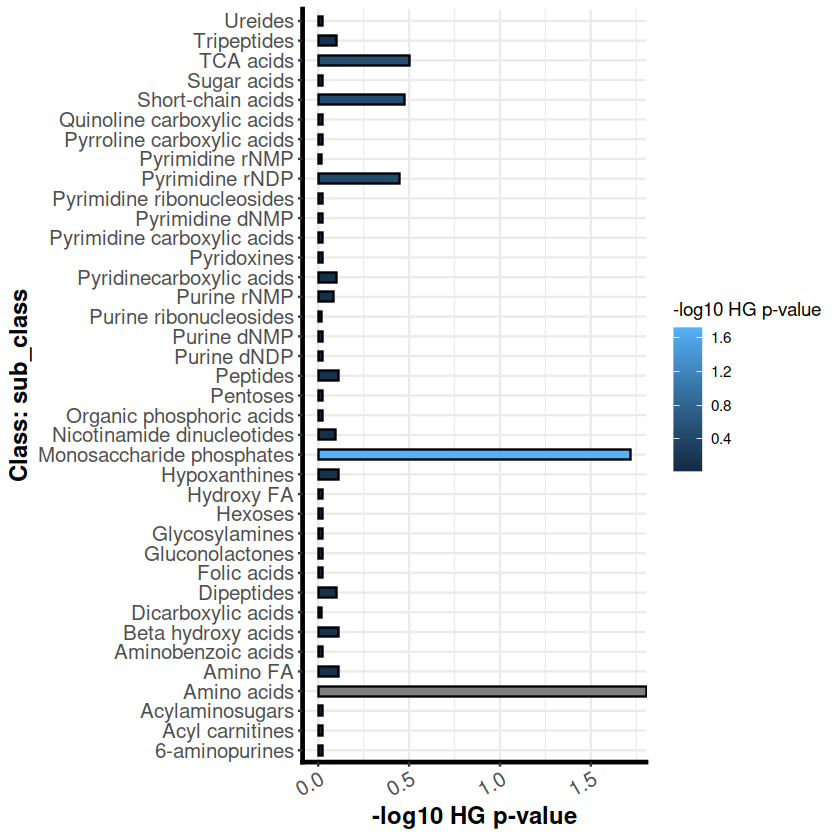

In [15]:
plot_met_enrichment(metenrichment, "sub_class","HG", no=1)

### Check the pathways with reactions of all the significant metabolites

In [16]:
met_path = met_pathways(df_metenrichment = metenrichment, 'hsa')
head(met_path)

,rxn,refmet_name,Exact mass,KEGG ID,Metabolite,20181204-Blank_mean,20181204-MMV693183P-24_mean,Fold_change,log2Fold_change,t_value,⋯,metabolite_id,super_class,main_class,sub_class,formula,HG p-value,Rxn_name,PATHWAY,pathway_id,sps_path_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<named list>,<chr>,<chr>,<chr>,<chr>,<dbl>,<named list>,<chr>,<chr>,<chr>
1,R00021,Glutamic acid,147.0532,C00025,glutamate,12514514,2083475415,166.4847,7.379246,-25.98474,⋯,ME458921,Organic acids,Amino acids and peptides,Amino acids,C5H9NO4,0.0000000,L-glutamate:ferredoxin oxidoreductase (transaminating),Glyoxylate and dicarboxylate metabolism,rn00630,hsa00630
2,R00021,Glutamic acid,147.0532,C00025,glutamate,12514514,2083475415,166.4847,7.379246,-25.98474,⋯,ME458921,Organic acids,Amino acids and peptides,Amino acids,C5H9NO4,0.0000000,L-glutamate:ferredoxin oxidoreductase (transaminating),Nitrogen metabolism,rn00910,hsa00910
3,R00021,Glutamine,146.0691,C00064,glutamine,3428294,84841368,24.7474,4.629205,-12.38909,⋯,ME458922,Organic acids,Amino acids and peptides,Amino acids,C5H10N2O3,0.0000000,L-glutamate:ferredoxin oxidoreductase (transaminating),Glyoxylate and dicarboxylate metabolism,rn00630,hsa00630
4,R00021,Glutamine,146.0691,C00064,glutamine,3428294,84841368,24.7474,4.629205,-12.38909,⋯,ME458922,Organic acids,Amino acids and peptides,Amino acids,C5H10N2O3,0.0000000,L-glutamate:ferredoxin oxidoreductase (transaminating),Nitrogen metabolism,rn00910,hsa00910
5,R00021,Oxoglutaric acid,146.0215,C00026,a-ketoglutarate,406843.3,19538039.6,48.0235,5.585669,-28.63882,⋯,ME458853,Organic acids,TCA acids,TCA acids,C5H6O5,0.3147366,L-glutamate:ferredoxin oxidoreductase (transaminating),Glyoxylate and dicarboxylate metabolism,rn00630,hsa00630
6,R00021,Oxoglutaric acid,146.0215,C00026,a-ketoglutarate,406843.3,19538039.6,48.0235,5.585669,-28.63882,⋯,ME458853,Organic acids,TCA acids,TCA acids,C5H6O5,0.3147366,L-glutamate:ferredoxin oxidoreductase (transaminating),Nitrogen metabolism,rn00910,hsa00910


Find metabolites for which no pathways were registered in Kegg and/or no kegg id was found

In [17]:
setdiff(metenrichment$Metabolite,unique(met_path$Metabolite))

[1] "4-phosphopantothenate"              "hydroxyproline/Aminolevulinate"    
 [3] "alanine/sarcosine"                  "DLH"                               
 [5] "DLS"                                "Acetylcarnitine"                   
 [7] "2-Hydroxy-2-methylbutanedioic acid" "homocysteic acid"                  
 [9] "N-Acetyl-L-alanine"                 "Acetyl-glycine"                    
[11] "Acetyllysine"                       "PD"                                
[13] "threonine/homoserine"

### Get pathway enrichment sore.

Once we have the pathway information, we can calculate enrichment score of pathways. Again, here i have used hypergeometric score. For hypergeometric score, we need to know the total number of kegg compounds that are linked to kegg pathways. 
N = total no. of cmpds linked to kegg pathway (this is the step which might take long), so I advice to run the script comp_linkedto_pathways() just the first time or after 6 months or so if desired to run the pipeline again. save the result from comp_linkedto_pathways() and load it. Loading from saved file would save time for another analysis with another study. However the package takes care of loading. Save the data in the data folder.

L = No. of cmpds in a pathway
M= no. of altered cmpds in a pathway
K =  total no. of altered cmpds
phyper(M,L, N-L, K)


This function also utilizes korg dataset from pathview package.

In [18]:
load('../data/ls_path.RData')
load('../data/korg.RData')
kegg_es = path_enrichmentscore(met_path,sig_metabolite_kegg_id=sig_metabolite_kegg_id,ls_path=ls_path,refmet_class=refmet_class,sps='hsa',padj='BH', kegg_comp_path=FALSE)

In [19]:
head(kegg_es)

,Pathway name,No.of mets in study,Total_no._of_comps_in_pathway,pathway_HG p-value,Padjust
,<fct>,<int>,<int>,<dbl>,<dbl>
1,"Alanine, aspartate and glutamate metabolism",13,28,0.7845142,1
2,alpha-Linolenic acid metabolism,6,44,1.0000000,1
3,Amino sugar and nucleotide sugar metabolism,12,118,1.0000000,1
4,Aminoacyl-tRNA biosynthesis,15,52,0.9999716,1
5,Arachidonic acid metabolism,10,75,1.0000000,1
6,Arginine and proline metabolism,11,72,1.0000000,1


### Plot pathway network
Only plotting significant pathways (pathway with p-value significance).

The pathway network is such that it shows metabolites that are connected to different pathways and same metabolite in different pathway. Color of nodes of metabolites are according to the fold change of metabolites (low expression in green and high in red) and size of pathway nodes (square nodes) are according to the number of branches (meaning no of metabolites). All metabolite are written in blue

Warning message:
“ggrepel: 97 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


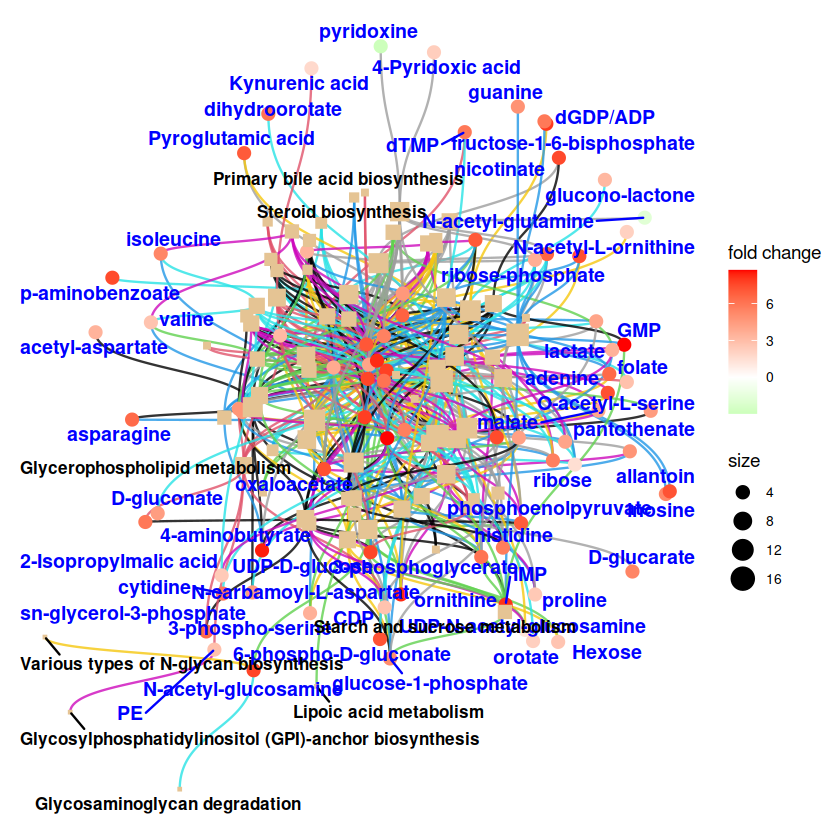

In [20]:
plot_pathway_networks (met_path,kegg_es, TRUE)

### Heatmap

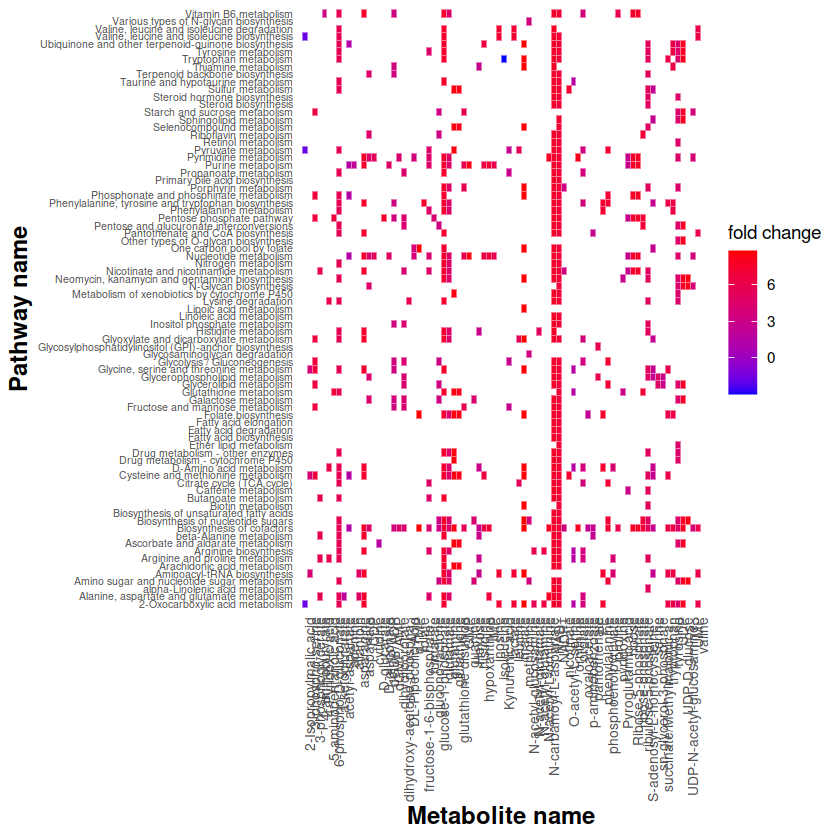

In [21]:
plot_heatmap(met_path, shorten_name=TRUE,refmet_name=FALSE, xaxis=8, yaxis=6)

### Dotplot

Warning message:
“Use of `significant_pathways[["pathway_HG p-value"]]` is discouraged. Use `.data[["pathway_HG p-value"]]` instead.”


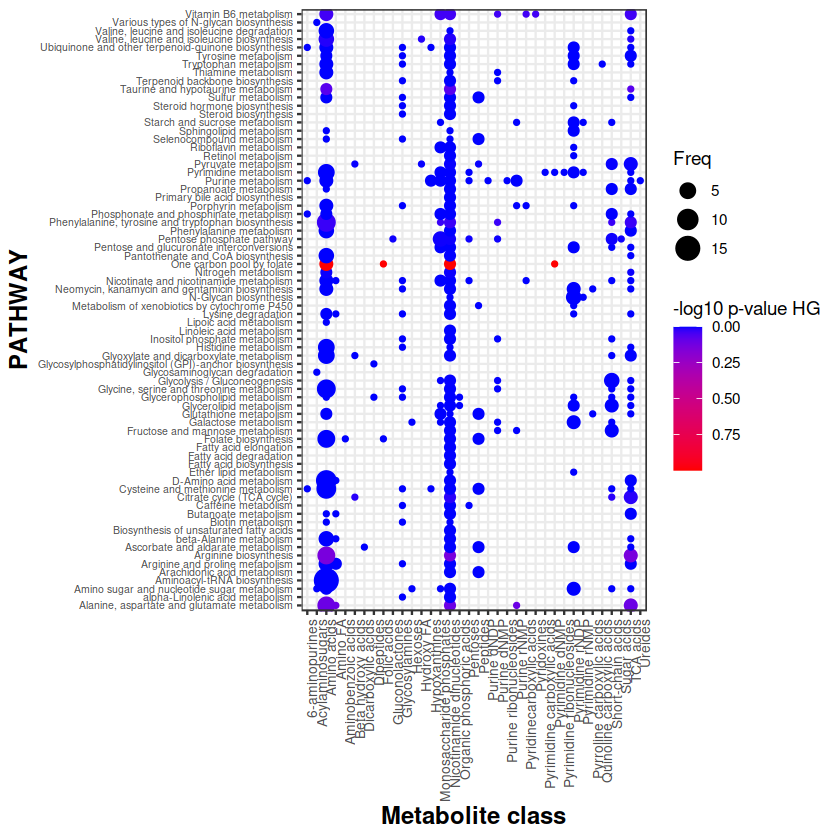

In [22]:

dotplot_met_class_path (met_path, kegg_es,"sub_class",xaxis=8,yaxis=6)

### Get the gene and enzyme info

Here we get the information of genes involved in enriched pathways for specified organism

In [23]:
met_gene_info = enzyme_gene_info (metenrichment, "hsa","sub_class")
head(met_gene_info)

,orthology_id,ORTHOLOGY,gene_id,gene_name,ORGANISM,PATHWAY,DBLINKS,MOTIF,rxn,Metabolite,KEGG ID,sub_class,Rxn_name,RCLASS,EQUATION,EQUATION_more,ENZYME
,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>
1,K00002,alcohol dehydrogenase (NADP+) [EC:1.1.1.2],10327,(RefSeq) aldo-keto reductase family 1 member A1,Homo sapiens (human),"Glycolysis / Gluconeogenesis , Pentose and glucuronate interconversions , Ascorbate and aldarate metabolism , Glycerolipid metabolism , Pyruvate metabolism , Metabolic pathways , Biosynthesis of cofactors , Chemical carcinogenesis - reactive oxygen species","NCBI-GeneID: 10327 , NCBI-ProteinID: NP_001189342, OMIM: 103830 , HGNC: 380 , Ensembl: ENSG00000117448 , Pharos: P14550(Tchem) , UniProt: P14550 V9HWI0",Pfam: Aldo_ket_red,R05231,NADP+,C00006,Nicotinamide dinucleotides,6-Hydroxyhexanoate:NADP+ oxidoreductase,"RC00001 C00005_C00006, RC00087 C06102_C06103",C06103 + C00006 <=> C06102 + C00005 + C00080,6-Hydroxyhexanoic acid + NADP+ <=> Adipate semialdehyde + NADPH + H+,1.1.1.2
2,K00002,alcohol dehydrogenase (NADP+) [EC:1.1.1.2],10327,(RefSeq) aldo-keto reductase family 1 member A1,Homo sapiens (human),"Glycolysis / Gluconeogenesis , Pentose and glucuronate interconversions , Ascorbate and aldarate metabolism , Glycerolipid metabolism , Pyruvate metabolism , Metabolic pathways , Biosynthesis of cofactors , Chemical carcinogenesis - reactive oxygen species","NCBI-GeneID: 10327 , NCBI-ProteinID: NP_001189342, OMIM: 103830 , HGNC: 380 , Ensembl: ENSG00000117448 , Pharos: P14550(Tchem) , UniProt: P14550 V9HWI0",Pfam: Aldo_ket_red,R01481,NADP+,C00006,Nicotinamide dinucleotides,L-gulonate:NADP+ 6-oxidoreductase,"RC00001 C00005_C00006, RC00108 C00191_C00800",C00800 + C00006 <=> C00191 + C00005 + C00080,L-Gulonate + NADP+ <=> D-Glucuronate + NADPH + H+,"1.1.1.2 , 1.1.1.19"
3,K00002,alcohol dehydrogenase (NADP+) [EC:1.1.1.2],10327,(RefSeq) aldo-keto reductase family 1 member A1,Homo sapiens (human),"Glycolysis / Gluconeogenesis , Pentose and glucuronate interconversions , Ascorbate and aldarate metabolism , Glycerolipid metabolism , Pyruvate metabolism , Metabolic pathways , Biosynthesis of cofactors , Chemical carcinogenesis - reactive oxygen species","NCBI-GeneID: 10327 , NCBI-ProteinID: NP_001189342, OMIM: 103830 , HGNC: 380 , Ensembl: ENSG00000117448 , Pharos: P14550(Tchem) , UniProt: P14550 V9HWI0",Pfam: Aldo_ket_red,R00746,NADP+,C00006,Nicotinamide dinucleotides,Ethanol:NADP+ oxidoreductase,"RC00001 C00005_C00006, RC00088 C00084_C00469",C00469 + C00006 <=> C00084 + C00005 + C00080,Ethanol + NADP+ <=> Acetaldehyde + NADPH + H+,"1.1.1.2 , 1.1.1.71"
4,K00002,alcohol dehydrogenase (NADP+) [EC:1.1.1.2],10327,(RefSeq) aldo-keto reductase family 1 member A1,Homo sapiens (human),"Glycolysis / Gluconeogenesis , Pentose and glucuronate interconversions , Ascorbate and aldarate metabolism , Glycerolipid metabolism , Pyruvate metabolism , Metabolic pathways , Biosynthesis of cofactors , Chemical carcinogenesis - reactive oxygen species","NCBI-GeneID: 10327 , NCBI-ProteinID: NP_001189342, OMIM: 103830 , HGNC: 380 , Ensembl: ENSG00000117448 , Pharos: P14550(Tchem) , UniProt: P14550 V9HWI0",Pfam: Aldo_ket_red,R01041,NADP+,C00006,Nicotinamide dinucleotides,glycerol:NADP+ oxidoreductase,"RC00001 C00005_C00006, RC00099 C00116_C00577",C00116 + C00006 <=> C00577 + C00005 + C00080,Glycerol + NADP+ <=> D-Glyceraldehyde + NADPH + H+,"1.1.1.2 , 1.1.1.21 , 1.1.1.72 , 1.1.1.372"
5,K00006,glycerol-3-phosphate dehydrogenase (NAD+) [EC:1.1.1.8],23171,(RefSeq) glycerol-3-phosphate dehydrogenase 1 like,Homo sapiens (human),Glycerophospholipid metabolism,"NCBI-GeneID: 23171 , NCBI-ProteinID: NP_055956, OMIM: 611778 , HGNC: 28956 , Ensembl: ENSG00000152642 , Pharos: Q8N335(Tbio) , UniProt: Q8N335",Pfam: NAD_Gly3P_dh_N NAD_Gly3P_dh_C GPD_NAD_C_bact F420_oxidored,R00842,sn-glycerol-3-phosphate,C00093,Organic phos

#### Get the information if metabolite is a reactant or substrate

In [24]:
rclass_info = react_substrate(met_gene_info)
head(rclass_info)

,orthology_id,ORTHOLOGY,gene_id,gene_name,ORGANISM,PATHWAY,DBLINKS,MOTIF,rxn,Metabolite,KEGG ID,sub_class,Rxn_name,RCLASS,EQUATION,EQUATION_more,ENZYME,reactant_product
,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>
1,K00002,alcohol dehydrogenase (NADP+) [EC:1.1.1.2],10327,(RefSeq) aldo-keto reductase family 1 member A1,Homo sapiens (human),"Glycolysis / Gluconeogenesis , Pentose and glucuronate interconversions , Ascorbate and aldarate metabolism , Glycerolipid metabolism , Pyruvate metabolism , Metabolic pathways , Biosynthesis of cofactors , Chemical carcinogenesis - reactive oxygen species","NCBI-GeneID: 10327 , NCBI-ProteinID: NP_001189342, OMIM: 103830 , HGNC: 380 , Ensembl: ENSG00000117448 , Pharos: P14550(Tchem) , UniProt: P14550 V9HWI0",Pfam: Aldo_ket_red,R05231,NADP+,C00006,Nicotinamide dinucleotides,6-Hydroxyhexanoate:NADP+ oxidoreductase,"RC00001 C00005_C00006, RC00087 C06102_C06103",C06103 + C00006 <=> C06102 + C00005 + C00080,6-Hydroxyhexanoic acid + NADP+ <=> Adipate semialdehyde + NADPH + H+,1.1.1.2,Substrate
2,K00002,alcohol dehydrogenase (NADP+) [EC:1.1.1.2],10327,(RefSeq) aldo-keto reductase family 1 member A1,Homo sapiens (human),"Glycolysis / Gluconeogenesis , Pentose and glucuronate interconversions , Ascorbate and aldarate metabolism , Glycerolipid metabolism , Pyruvate metabolism , Metabolic pathways , Biosynthesis of cofactors , Chemical carcinogenesis - reactive oxygen species","NCBI-GeneID: 10327 , NCBI-ProteinID: NP_001189342, OMIM: 103830 , HGNC: 380 , Ensembl: ENSG00000117448 , Pharos: P14550(Tchem) , UniProt: P14550 V9HWI0",Pfam: Aldo_ket_red,R01481,NADP+,C00006,Nicotinamide dinucleotides,L-gulonate:NADP+ 6-oxidoreductase,"RC00001 C00005_C00006, RC00108 C00191_C00800",C00800 + C00006 <=> C00191 + C00005 + C00080,L-Gulonate + NADP+ <=> D-Glucuronate + NADPH + H+,"1.1.1.2 , 1.1.1.19",Substrate
3,K00002,alcohol dehydrogenase (NADP+) [EC:1.1.1.2],10327,(RefSeq) aldo-keto reductase family 1 member A1,Homo sapiens (human),"Glycolysis / Gluconeogenesis , Pentose and glucuronate interconversions , Ascorbate and aldarate metabolism , Glycerolipid metabolism , Pyruvate metabolism , Metabolic pathways , Biosynthesis of cofactors , Chemical carcinogenesis - reactive oxygen species","NCBI-GeneID: 10327 , NCBI-ProteinID: NP_001189342, OMIM: 103830 , HGNC: 380 , Ensembl: ENSG00000117448 , Pharos: P14550(Tchem) , UniProt: P14550 V9HWI0",Pfam: Aldo_ket_red,R00746,NADP+,C00006,Nicotinamide dinucleotides,Ethanol:NADP+ oxidoreductase,"RC00001 C00005_C00006, RC00088 C00084_C00469",C00469 + C00006 <=> C00084 + C00005 + C00080,Ethanol + NADP+ <=> Acetaldehyde + NADPH + H+,"1.1.1.2 , 1.1.1.71",Substrate
4,K00002,alcohol dehydrogenase (NADP+) [EC:1.1.1.2],10327,(RefSeq) aldo-keto reductase family 1 member A1,Homo sapiens (human),"Glycolysis / Gluconeogenesis , Pentose and glucuronate interconversions , Ascorbate and aldarate metabolism , Glycerolipid metabolism , Pyruvate metabolism , Metabolic pathways , Biosynthesis of cofactors , Chemical carcinogenesis - reactive oxygen species","NCBI-GeneID: 10327 , NCBI-ProteinID: NP_001189342, OMIM: 103830 , HGNC: 380 , Ensembl: ENSG00000117448 , Pharos: P14550(Tchem) , UniProt: P14550 V9HWI0",Pfam: Aldo_ket_red,R01041,NADP+,C00006,Nicotinamide dinucleotides,glycerol:NADP+ oxidoreductase,"RC00001 C00005_C00006, RC00099 C00116_C00577",C00116 + C00006 <=> C00577 + C00005 + C00080,Glycerol + NADP+ <=> D-Glyceraldehyde + NADPH + H+,"1.1.1.2 , 1.1.1.21 , 1.1.1.72 , 1.1.1.372",Substrate
5,K00006,glycerol-3-phosphate dehydrogenase (NAD+) [EC:1.1.1.8],23171,(RefSeq) glycerol-3-phosphate dehydrogenase 1 like,Homo sapiens (human),Glycerophospholipid metabolism,"NCBI-GeneID: 23171 , NCBI-ProteinID: NP_055956, OMIM: 611778 , HGNC: 28956 , Ensembl: ENSG00000152642 , Pharos: Q8N335(Tbio) , UniProt: Q8N335",Pfam: NAD_Gly3P_dh_N NAD_Gly3P_dh_C GPD_NAD_C_bact F

#### Get gene info in short form

In [25]:
met_gene_info2=data.table::data.table(rclass_info)[,lapply(.SD, function(x) toString(unique(x))), by = 'Metabolite']